In [2]:
from sklearn.datasets import load_digits

from sklearn.datasets import load_digits
# loading the  load_digits dataset
dataset = load_digits()

list(dataset.keys())

['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR']

In [3]:
import numpy as np

print('Target variables  : ', dataset['target_names'])

(unique, counts) = np.unique(dataset['target'], return_counts=True)

print('Unique values of the target variable', unique)
print('Counts of the target variable :', counts)

Target variables  :  [0 1 2 3 4 5 6 7 8 9]
Unique values of the target variable [0 1 2 3 4 5 6 7 8 9]
Counts of the target variable : [178 182 177 183 181 182 181 179 174 180]


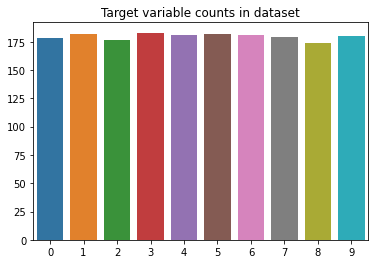

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=dataset['target_names'], y=counts)
plt.title('Target variable counts in dataset')
plt.show()

In [6]:
# Step 1: Define explonatory variables and target variable

X = dataset['data']
y = dataset['target']


In [7]:
# Step 2:  Apply normalization operation for numerical stability

from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
X = standardizer.fit_transform(X)

In [8]:
# Step 3: Split the dataset into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state=0)


In [9]:
# Step 4: Fit a Logistic Regression Model to the train data

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)


LogisticRegression()

In [10]:
# Step 5: Make predictions on the testing data

y_pred = log_reg.predict(X_test)

print(y_pred)



[2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8 8 7 8 4 7 5 4 9 2 9 4 7 6 8 9 4 3
 1 0 1 8 6 7 7 1 0 7 6 2 1 9 6 7 9 0 0 9 1 6 3 0 2 3 4 1 9 2 6 9 1 8 3 5 1
 2 8 2 2 9 7 2 3 6 0 5 3 7 5 1 2 9 9 3 1 4 7 4 8 5 8 5 5 2 5 9 0 7 1 4 7 3
 4 8 9 7 9 8 2 1 5 2 5 8 4 1 7 0 6 1 5 5 9 9 5 9 9 5 7 5 6 2 8 6 9 6 1 5 1
 5 9 9 1 5 3 6 1 8 9 8 7 6 7 6 5 6 0 8 8 9 8 6 1 0 4 1 6 3 8 6 7 4 9 6 3 0
 3 3 3 0 7 7 5 7 8 0 7 1 9 6 4 5 0 1 4 6 4 3 3 0 9 5 9 2 1 4 2 1 6 8 9 2 4
 9 3 7 6 2 3 3 1 6 9 3 6 3 2 2 0 7 6 1 1 9 7 2 7 8 5 5 7 5 2 3 7 2 7 5 5 7
 0 9 1 6 5 9 7 4 3 8 0 3 6 4 6 3 2 6 8 8 8 4 6 7 5 2 4 5 3 2 4 6 9 4 5 4 3
 4 6 2 9 0 8 7 2 0 9 6 0 4 2 0 7 9 8 5 7 8 2 8 4 3 7 2 6 9 9 5 1 0 8 2 8 9
 5 6 2 2 7 2 1 5 1 6 4 5 0 9 4 1 1 7 0 8 9 0 5 4 3 8 8 6 5 3 4 4 4 8 8 7 0
 9 6 3 5 2 3 0 8 8 3 1 3 3 0 0 4 6 0 7 7 6 2 0 4 4 2 3 7 1 9 8 6 8 5 6 2 2
 3 1 7 7 8 0 3 3 2 1 5 5 9 1 3 7 0 0 7 0 4 5 9 3 3 4 3 1 8 9 8 3 6 3 1 6 2
 1 7 5 5 1 9]


In [11]:
y_proba = log_reg.predict_proba(X_test)
print(y_proba)

[[1.60431225e-07 1.68776124e-06 9.99977460e-01 ... 1.05648764e-05
  7.46813386e-07 3.02862254e-07]
 [8.10958744e-05 6.22908543e-04 6.56525905e-03 ... 1.36927241e-05
  8.85347435e-01 4.39997424e-04]
 [1.05633860e-10 6.78520271e-07 9.99995816e-01 ... 1.44366845e-08
  2.70602341e-08 7.26108358e-10]
 ...
 [8.52042111e-06 3.05480002e-07 1.66325831e-08 ... 6.86311476e-08
  6.11226842e-06 1.19866923e-04]
 [1.41011525e-06 8.63241459e-01 2.90409707e-04 ... 1.10408312e-05
  9.13773053e-02 6.64673668e-06]
 [4.40032508e-05 1.04528507e-08 2.20654490e-07 ... 1.79475486e-06
  6.06047882e-05 9.98743434e-01]]


In [12]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)


[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  0 43  1  0  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0  1  0]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  0  1  0  0 47  0  0]
 [ 0  3  1  0  0  0  0  0 44  0]
 [ 0  0  0  0  0  1  0  0  0 46]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted', ylabel='Actual'>

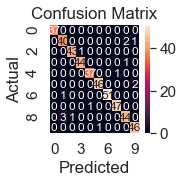

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(conf_matrix, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'

plt.figure(figsize = (2,2))
sns.set(font_scale=1.4)#for label size
plt.title('Confusion Matrix')
sns.heatmap(df_cm, annot=True,annot_kws={"size": 12})# font size

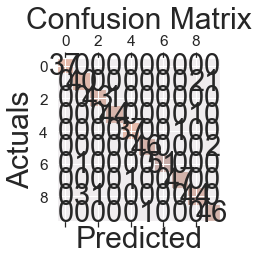

In [15]:
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predicted', fontsize=30)
plt.ylabel('Actuals', fontsize=30)
plt.title('Confusion Matrix', fontsize=30)
plt.show()

In [16]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

print('macro-averaging Recall = {:0.3f}'.format(recall_score(y_test, y_pred, average='macro')))
print('micro-averaging Recall = {:0.3f}'.format(recall_score(y_test, y_pred, average='micro')))
print('weighted-averaging Recall = {:0.3f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('macro-averaging Precision = {:0.3f}'.format(precision_score(y_test, y_pred, average='macro')))
print('micro-averaging Precision = {:0.3f}'.format(precision_score(y_test, y_pred, average='micro')))
print('weighted-averaging Precision = {:0.3f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('macro-averaging F1_measure = {:0.3f}'.format(f1_score(y_test, y_pred, average='macro')))
print('micro-averaging F1_measureF1_measure = {:0.3f}'.format(f1_score(y_test, y_pred, average='micro')))
print('weighted-averaging F1_measureF1_measure = {:0.3f}'.format(f1_score(y_test, y_pred, average='weighted')))


macro-averaging Recall = 0.967
micro-averaging Recall = 0.967
weighted-averaging Recall = 0.967
macro-averaging Precision = 0.967
micro-averaging Precision = 0.967
weighted-averaging Precision = 0.967
macro-averaging F1_measure = 0.967
micro-averaging F1_measureF1_measure = 0.967
weighted-averaging F1_measureF1_measure = 0.967


In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.93      0.92        43
           2       0.98      0.98      0.98        44
           3       0.98      0.98      0.98        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       1.00      0.98      0.99        52
           7       0.98      0.98      0.98        48
           8       0.94      0.92      0.93        48
           9       0.94      0.98      0.96        47

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450



In [18]:
softmax_reg = LogisticRegression(solver='lbfgs', multi_class='multinomial')
softmax_reg.fit(X_train, y_train)
y_pred = softmax_reg.predict(X_test)

print(classification_report(y_test, y_pred))

print('macro-averaging Recall = {:0.3f}'.format(recall_score(y_test, y_pred, average='macro')))
print('micro-averaging Recall = {:0.3f}'.format(recall_score(y_test, y_pred, average='micro')))
print('weighted-averaging Recall = {:0.3f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('macro-averaging Precision = {:0.3f}'.format(precision_score(y_test, y_pred, average='macro')))
print('micro-averaging Precision = {:0.3f}'.format(precision_score(y_test, y_pred, average='micro')))
print('weighted-averaging Precision = {:0.3f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('macro-averaging F1_measure = {:0.3f}'.format(f1_score(y_test, y_pred, average='macro')))
print('micro-averaging F1_measureF1_measure = {:0.3f}'.format(f1_score(y_test, y_pred, average='micro')))
print('weighted-averaging F1_measureF1_measure = {:0.3f}'.format(f1_score(y_test, y_pred, average='weighted')))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.93      0.92        43
           2       0.98      0.98      0.98        44
           3       0.98      0.98      0.98        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       1.00      0.98      0.99        52
           7       0.98      0.98      0.98        48
           8       0.94      0.92      0.93        48
           9       0.94      0.98      0.96        47

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450

macro-averaging Recall = 0.967
micro-averaging Recall = 0.967
weighted-averaging Recall = 0.967
macro-averaging Precision = 0.967
micro-averaging Precision = 0.967
weighted-averaging Precision = 0.967
macro-averaging F1_measure = 0.967
micro